### Azure Face Service - Face Detect API Exercise

#### Imports

In [2]:
# Importing Useful Python Libraries or Packages
import asyncio
import io
import glob
import os
import sys
import time
import uuid
import requests
from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw


from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face.models import TrainingStatusType, Person


import matplotlib.pyplot as plt

#### Utility Functions

In [3]:
def show_image_in_cell(face_url):
    response = requests.get(face_url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(20,10))
    plt.imshow(img)
    plt.show()

In [4]:
def show_image_object_in_cell(image_object):
    plt.figure(figsize=(20,10))
    plt.imshow(image_object)
    plt.show()

In [5]:
# TAKEN FROM THE Azure SDK Sample
# Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))

In [6]:
def drawFaceRectangles(source_file, detected_face_object) :
    # Download the image from the url
    response = requests.get(source_file)
    img = Image.open(BytesIO(response.content))
    # Draw a red box around every detected faces
    draw = ImageDraw.Draw(img)
    for face in detected_face_object:
        draw.rectangle(getRectangle(face), outline='red', width = 10)
    return img

#####  Accessing Specific Azure Resources

In [7]:
KEY = "f008df1c6e394068b1c0ec14a3313854"
ENDPOINT = "https://firstfaceservicedemo.cognitiveservices.azure.com/"

In [8]:

# Create an authenticated FaceClient.
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))
face_client.api_version

'1.0'

##### Setting up Input Data

In [9]:
face_image = "https://images.theconversation.com/files/538951/original/file-20230724-17-988lxn.jpg"
selected_image = face_image

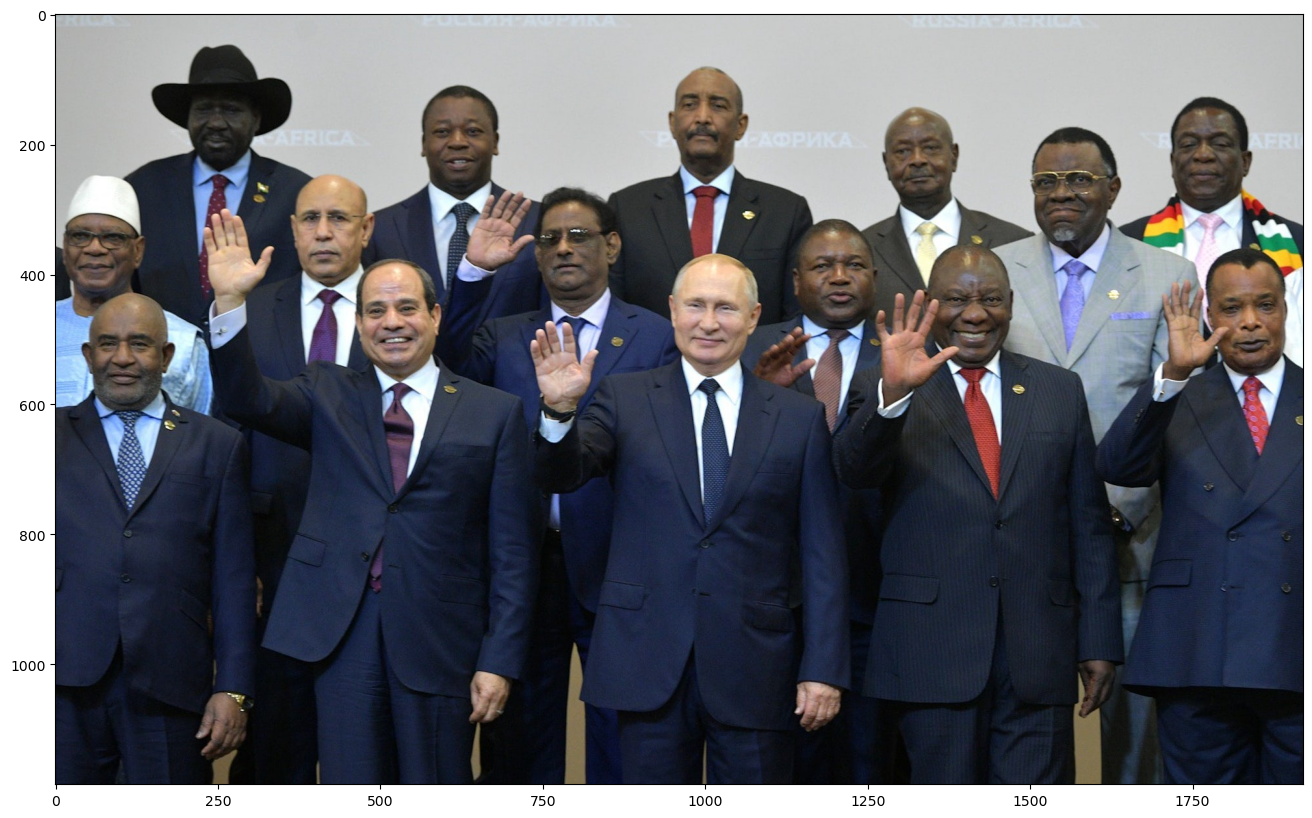

In [10]:
show_image_in_cell(face_image)

##### Face Detection Functions Using Azure Face Service Python SDK

In [11]:
# Detect Face form an image
def detect_face_from_any_url(selected_image):
    # Todo: set the face_client.face.detect_with_url object
    detected_faces = face_client.face.detect_with_url(url=selected_image, detection_model='detection_03')
    if not detected_faces:
        raise Exception('No face detected from image {}'.format(single_image_name))        
    print('Total face(s) detected  from {}'.format(str(len(detected_faces))))
    return detected_faces

In [12]:
# Define a function to output the faces detected
def list_all_faces_from_detected_face_object(detected_faces_object):
    print('We found total {} face(s) in selected face detected object.'.format(str(len(detected_faces_object))))
    for face in detected_faces_object: 
        print (face.face_id)

##### Detecting Faces From The Input Image

In [13]:
detected_faces_object = detect_face_from_any_url(selected_image)

Total face(s) detected  from 15


In [14]:
list_all_faces_from_detected_face_object(detected_faces_object)

We found total 15 face(s) in selected face detected object.
191e8eae-7a90-48d3-a1dd-7dd85ee325d1
0324d0a8-adef-4d1e-9d89-8920426fe678
beed305a-a805-489e-b7c1-d50dfdbe68c8
574eef61-0b8f-4b8e-bee1-a7983e8a4d3e
d18541c9-64f4-49bc-b9c0-8aca086bc31d
12427977-bd01-460c-abc1-825d87b1084c
a3201540-9d76-41f9-8146-017951a36392
3c302003-a077-4549-b2a3-8b7149b762a5
ce8a4820-2e50-4379-985d-cd1da108904a
a36f2d38-e7e3-40e9-8201-825172acc50a
a67864b1-502a-4974-aeed-3b559c4fd625
308833d1-988a-47de-a044-809d7725031d
b2bd419d-eab5-4cec-a336-ac7ce7e3490f
20359416-8522-4ef8-9cab-28f0d7965859
318faf65-de17-4a00-bad0-297f55d5fa6a


##### Showing Bounding Box Around the Detected Face

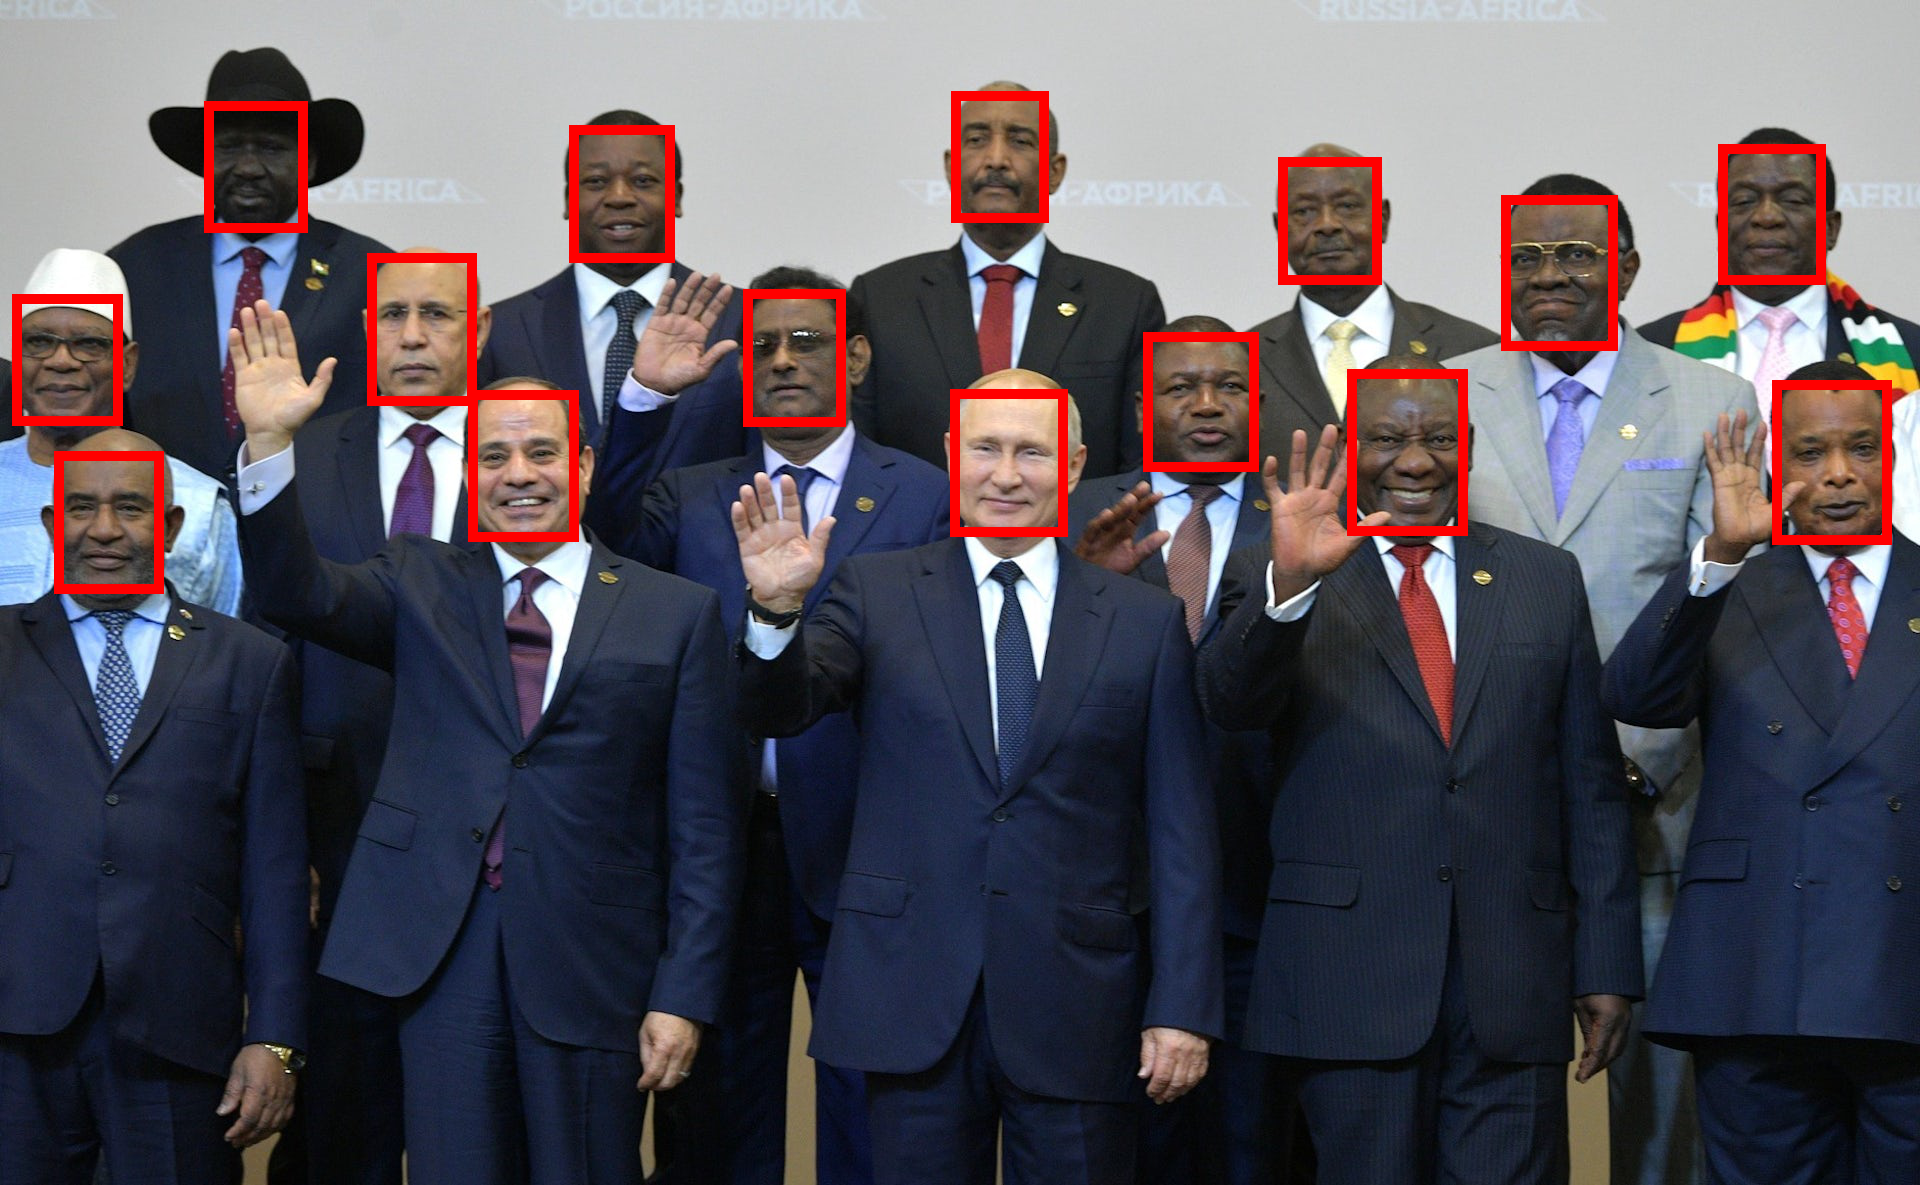

In [15]:
drawFaceRectangles(selected_image, detected_faces_object)